In [1]:
import datetime

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import yaml
from scipy.stats import spearmanr, pearsonr

get_ipython().run_line_magic('matplotlib', 'inline')

Matplotlib is building the font cache; this may take a moment.


In [19]:
perp_fp_fmt = '../output/bin_selection/perplexity/{sample}/bins_{bin}/{fold}/perplexity.yml'

tpm_fmt = '../output/bin_selection/quants/{sample}/bins_{bin}/{fold}/quant.sf'

exp_config = '../snakefiles/config.yml'

with open(exp_config, 'r') as f:
    cfg = yaml.safe_load(f)
    SAMPLES = cfg['sample-names']
    BINS =  list(range(1, 1+cfg['bins']))

print(SAMPLES)
print(BINS)

['sample_01']
[1, 2, 3, 4, 5, 6, 7, 8]


In [7]:
def perplexity_plot(sample, bins, folds):
    df = pd.DataFrame()
    for b in bins:
        #folds_rhos = []
        for fold in range(1, folds + 1):
            with open(perp_fp_fmt.format(sample=sample, bin=b, fold=fold), 'r') as f:
                perp_result = yaml.safe_load(f)
            #folds_rhos.append(rho)
#            _b = float(b)
            df = df.append(dict(perplexity=perp_result['smoothed_perplexity'],
                                n_bins=b, 
                              fold=fold), 
                           ignore_index=True)
    
    fig, ax = plt.subplots(1, 1, figsize=(10, 7))
    ax.set_title('Sample {}{}'.format(sample[-3], sample[-1]), fontsize=20)
    sns.lineplot(x="n_bins", y="perplexity", data=df, ax=ax, units="fold", estimator=None, color='#AAAAAA')
    sns.lineplot(x="n_bins", y="perplexity", data=df, ax=ax, err_style=None, lw=3, color="red")
    
    ax.set_ylabel('Perplexity', fontsize=20)
    ax.set_xlabel('n_bins', fontsize=20)
    ax.tick_params(axis='both', which='major', labelsize=15)

    plt.show()
#    plt.savefig(str(sample)+'-'+str(datetime.datetime.now().time())+'.png')
    
    
    return ax

# perplexity_plot(SAMPLES[0], BINS, 5)

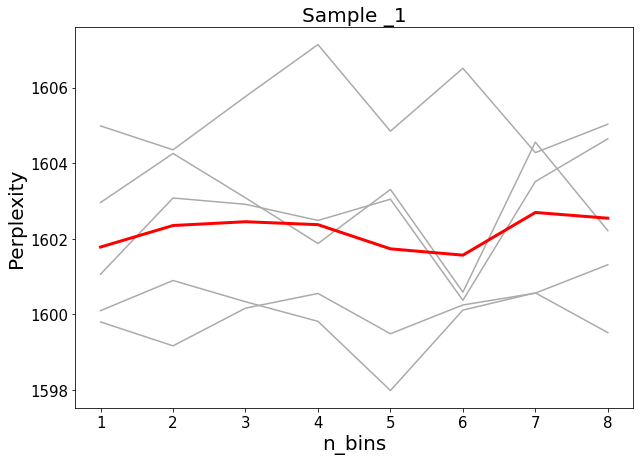

In [20]:
for sample in SAMPLES:
    perplexity_plot(sample, BINS, 5)